<a href="https://colab.research.google.com/github/k1rill-dev/ML/blob/main/ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://raw.githubusercontent.com/vlad-kalambet/datasets/main/data/flightdata.csv

--2022-01-25 14:21:22--  https://raw.githubusercontent.com/vlad-kalambet/datasets/main/data/flightdata.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1590176 (1.5M) [text/plain]
Saving to: ‘flightdata.csv’

flightdata.csv      100%[===================>]   1.52M  --.-KB/s    in 0.06s   

2022-01-25 14:21:22 (26.7 MB/s) - ‘flightdata.csv’ saved [1590176/1590176]



In [ ]:
import pandas as pd
df = pd.read_csv('flightdata.csv')
df.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,DEST_AIRPORT_ID,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DEL15,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,Unnamed: 25
0,2016,1,1,1,5,DL,N836DN,1399,10397,ATL,14747,SEA,1905,1907.0,2.0,0.0,2143,2102.0,-41.0,0.0,0.0,0.0,338.0,295.0,2182.0,NaN
1,2016,1,1,1,5,DL,N964DN,1476,11433,DTW,13487,MSP,1345,1344.0,-1.0,0.0,1435,1439.0,4.0,0.0,0.0,0.0,110.0,115.0,528.0,NaN
2,2016,1,1,1,5,DL,N813DN,1597,10397,ATL,14747,SEA,940,942.0,2.0,0.0,1215,1142.0,-33.0,0.0,0.0,0.0,335.0,300.0,2182.0,NaN
3,2016,1,1,1,5,DL,N587NW,1768,14747,SEA,13487,MSP,819,820.0,1.0,0.0,1335,1345.0,10.0,0.0,0.0,0.0,196.0,205.0,1399.0,NaN
4,2016,1,1,1,5,DL,N836DN,1823,14747,SEA,11433,DTW,2300,2256.0,-4.0,0.0,607,615.0,8.0,0.0,0.0,0.0,247.0,259.0,1927.0,NaN


In [ ]:
df.shape  #сколько строк и столбцов содержит таблица

(11231, 26)

In [ ]:
df.isnull().values.any()  #проверка отстутствующих данных

True

In [ ]:
df.isnull().sum()  #где находятся отсутствующие значения

YEAR                       0
QUARTER                    0
MONTH                      0
DAY_OF_MONTH               0
DAY_OF_WEEK                0
UNIQUE_CARRIER             0
TAIL_NUM                   0
FL_NUM                     0
ORIGIN_AIRPORT_ID          0
ORIGIN                     0
DEST_AIRPORT_ID            0
DEST                       0
CRS_DEP_TIME               0
DEP_TIME                 107
DEP_DELAY                107
DEP_DEL15                107
CRS_ARR_TIME               0
ARR_TIME                 115
ARR_DELAY                188
ARR_DEL15                188
CANCELLED                  0
DIVERTED                   0
CRS_ELAPSED_TIME           0
ACTUAL_ELAPSED_TIME      188
DISTANCE                   0
Unnamed: 25            11231
dtype: int64

In [ ]:
df = df.drop('Unnamed: 25', axis=1)  #удаление столбца unnamed
df.isnull().sum() 

YEAR                     0
QUARTER                  0
MONTH                    0
DAY_OF_MONTH             0
DAY_OF_WEEK              0
UNIQUE_CARRIER           0
TAIL_NUM                 0
FL_NUM                   0
ORIGIN_AIRPORT_ID        0
ORIGIN                   0
DEST_AIRPORT_ID          0
DEST                     0
CRS_DEP_TIME             0
DEP_TIME               107
DEP_DELAY              107
DEP_DEL15              107
CRS_ARR_TIME             0
ARR_TIME               115
ARR_DELAY              188
ARR_DEL15              188
CANCELLED                0
DIVERTED                 0
CRS_ELAPSED_TIME         0
ACTUAL_ELAPSED_TIME    188
DISTANCE                 0
dtype: int64

In [ ]:
# фильтрация данных
# оставляем только нужные данные
df = df[['MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'ORIGIN', 'DEST', 'CRS_DEP_TIME', 'ARR_DEL15']]
df.isnull().sum()

MONTH             0
DAY_OF_MONTH      0
DAY_OF_WEEK       0
ORIGIN            0
DEST              0
CRS_DEP_TIME      0
ARR_DEL15       188
dtype: int64

In [ ]:
# строки с отсутствующими значениями
df[df.isnull().values.any(axis=1)].head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CRS_DEP_TIME,ARR_DEL15
177,1,9,6,MSP,SEA,701,NaN
179,1,10,7,MSP,DTW,1348,NaN
184,1,10,7,MSP,DTW,625,NaN
210,1,10,7,DTW,MSP,1200,NaN
478,1,22,5,SEA,JFK,2305,NaN


In [ ]:
df = df.fillna({'ARR_DEL15' : 1})    
df.iloc[177:185]

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CRS_DEP_TIME,ARR_DEL15
177,1,9,6,MSP,SEA,701,1.0
178,1,9,6,DTW,JFK,1527,0.0
179,1,10,7,MSP,DTW,1348,1.0
180,1,10,7,DTW,MSP,1540,0.0
181,1,10,7,JFK,ATL,1325,0.0
182,1,10,7,JFK,ATL,610,0.0
183,1,10,7,JFK,SEA,1615,0.0
184,1,10,7,MSP,DTW,625,1.0


In [ ]:
import math
# группировка времени отправления: делим каждое число на 100 и округляем до ближаейшего целого числа
for index, row in df.iterrows():
  df.loc[index, 'CRS_DEP_TIME'] = math.floor(row['CRS_DEP_TIME'] / 100)
df.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CRS_DEP_TIME,ARR_DEL15
0,1,1,5,ATL,SEA,19,0.0
1,1,1,5,DTW,MSP,13,0.0
2,1,1,5,ATL,SEA,9,0.0
3,1,1,5,SEA,MSP,8,0.0
4,1,1,5,SEA,DTW,23,0.0


In [ ]:
#создаем столбцы индикатора из origin и dest
# после удаляем сами эти столбцы
# столбец origin(5 кодов аэропортов) преобразовываем в 5 столбцов
# по 1 на каждый аэропорт. Каждый столбец должен содержать значение 1 или 0,
# указывающее, отбыл ли рейс из аэропорта, который представляет этот столбец
# dest обрабатывается точно так же
df = pd.get_dummies(df, columns=['ORIGIN', 'DEST'])
df.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,CRS_DEP_TIME,ARR_DEL15,ORIGIN_ATL,ORIGIN_DTW,ORIGIN_JFK,ORIGIN_MSP,ORIGIN_SEA,DEST_ATL,DEST_DTW,DEST_JFK,DEST_MSP,DEST_SEA
0,1,1,5,19,0.0,1,0,0,0,0,0,0,0,0,1
1,1,1,5,13,0.0,0,1,0,0,0,0,0,0,1,0
2,1,1,5,9,0.0,1,0,0,0,0,0,0,0,0,1
3,1,1,5,8,0.0,0,0,0,0,1,0,0,0,1,0
4,1,1,5,23,0.0,0,0,0,0,1,0,1,0,0,0


In [ ]:
# формирование выборок для обучения(80%) и тестирования(20%) и 
# задание столбцов признаков и столбцов меток
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(df.drop('ARR_DEL15', axis=1), df['ARR_DEL15'], 
                                  test_size=0.2, random_state=42)

In [ ]:
# создание модели обучения RandomForestClassifier и обучение его с помощью метода fit
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=13)
model.fit(train_x, train_y)

RandomForestClassifier(random_state=13)

In [ ]:
# метод predict - тестируем модель. Метод score определяет точность
predicted = model.predict(test_x)
model.score(test_x, test_y)

0.8642634623943035

In [ ]:
# создать набор вероятностей прогнозирования из тестовых данных
from sklearn.metrics import roc_auc_score
probabilites = model.predict_proba(test_x)

In [ ]:
# создание оценки roc auc из вероятностей с помощью метода sckit learn roc_aur_score
roc_auc_score(test_y, probabilites[:, 1])

0.7014819895830565

In [ ]:
# матрица неточностей(она предназначена для оценки количества ложных положительных,
# ложных отрицательных, истинных отрицательных и истинных положительных
# результатов)
from sklearn.metrics import confusion_matrix
confusion_matrix(test_y, predicted)

array([[1903,   33],
       [ 272,   39]])

In [ ]:
# вычисляем точность модели
from sklearn.metrics import precision_score
train_predictions = model.predict(train_x)
precision_score(train_y, train_predictions)

1.0

In [ ]:
# вычисляем отзыв
from sklearn.metrics import recall_score
recall_score(train_y, train_predictions)

0.9992012779552716

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

Text(0, 0.5, 'true positive rate')

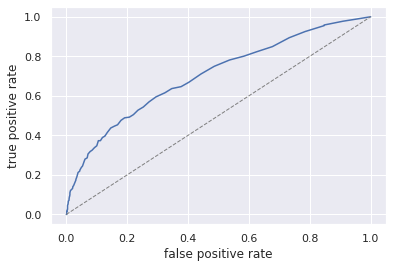

In [ ]:
# roc кривая
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(test_y, probabilites[:, 1])
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1], color='grey', lw=1, linestyle='--')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')

In [ ]:
def predict_delay(departure_date_time, origin, destination):
  from datetime import datetime
  try:
    departure_date_time_parsed = datetime.strptime(departure_date_time,
    '%d/%m/%Y %H:%M:%S')
  except ValueError as e:
    return 'Error parsing date/time - {}'.format(e)
  month = departure_date_time_parsed.month
  day = departure_date_time_parsed.day
  day_of_week = departure_date_time_parsed.isoweekday()
  hour = departure_date_time_parsed.hour
  origin = origin.upper()
  destination = destination.upper()
  input = [{'MONTH': month,
    'DAY': day,
    'DAY_OF_WEEK': day_of_week,
    'CRS_DEP_TIME': hour,
    'ORIGIN_ATL': 1 if origin == 'ATL' else 0,
    'ORIGIN_DTW': 1 if origin == 'DTW' else 0,
    'ORIGIN_JFK': 1 if origin == 'JFK' else 0,
    'ORIGIN_MSP': 1 if origin == 'MSP' else 0,
    'ORIGIN_SEA': 1 if origin == 'SEA' else 0,
    'DEST_ATL': 1 if destination == 'ATL' else 0,
    'DEST_DTW': 1 if destination == 'DTW' else 0,
    'DEST_JFK': 1 if destination == 'JFK' else 0,
    'DEST_MSP': 1 if destination == 'MSP' else 0,
    'DEST_SEA': 1 if destination == 'SEA' else 0 }]
  return model.predict_proba(pd.DataFrame(input))[0][0]

In [ ]:
# расчет вероятностей)
predict_delay('2/10/2018 10:00:00', 'ATl', 'SEA')

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- DAY
Feature names seen at fit time, yet now missing:
- DAY_OF_MONTH

  warnings.warn(message, FutureWarning)


0.99

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- DAY
Feature names seen at fit time, yet now missing:
- DAY_OF_MONTH

  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- DAY
Feature names seen at fit time, yet now missing:
- DAY_OF_MONTH

  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- DAY
Feature names seen at fit time, yet now missing:
- DAY_OF_MONTH

  warnings.warn(message, FutureWarning)
/

(0.0, 1.0)

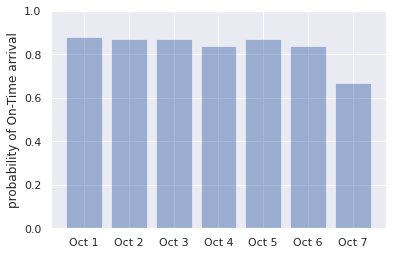

In [ ]:
import numpy as np
labels = ('Oct 1', 'Oct 2', 'Oct 3', 'Oct 4', 'Oct 5', 'Oct 6', 'Oct 7')
values = (predict_delay('1/10/2018 21:45:00', 'JFK', 'ATL'),
          predict_delay('2/10/2018 21:45:00', 'JFK', 'ATL'),
          predict_delay('3/10/2018 21:45:00', 'JFK', 'ATL'),
          predict_delay('4/10/2018 21:45:00', 'JFK', 'ATL'),
          predict_delay('5/10/2018 21:45:00', 'JFK', 'ATL'),
          predict_delay('6/10/2018 21:45:00', 'JFK', 'ATL'),
          predict_delay('7/10/2018 21:45:00', 'JFK', 'ATL')
)
alabels = np.arange(len(labels))
plt.bar(alabels, values, align='center', alpha=0.5)
plt.xticks(alabels, labels)
plt.ylabel('probability of On-Time arrival')
plt.ylim((0.0, 1.0))